# Ranking Data 
### Understanding the co-relation between keyword rankings with description or any other attribute. Here’s the dataset. 

Suggested questions:
Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?
Does APP ID (Also known as package name) play any role in ranking?  
Any other pattern or good questions that you can think of and answer?


In [1]:
import pandas as pd

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 200)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#figure(figsize=(20, 10), dpi=80)

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [3]:
import re
import numpy as np
import nltk

nltk.download('wordnet')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bbiuser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\bbiuser\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bbiuser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Cleaning

1) There is some degree of cleaning required.<br>
2) text consists of emojis, which is removed.<br>
3) lowercased.<br>
4) removed special characters<br>
5) remove extra spaces<br>

In [4]:
def clean(text): 
    # remove non english characters and emojis and lower case
    clean_text = text.encode('ascii',errors='ignore').decode('ascii',errors='ignore').lower()
    # remove special characters
    clean_text = re.sub("[^a-zA-Z0-9]+", " ",clean_text)
    # remove extra spaces
    clean_text = re.sub("\\s+", " ",clean_text)
    # lets strip the text
    clean_text=clean_text.strip()
    return clean_text

In [5]:
data=pd.read_csv('browser_rankings_data.csv',skiprows=1,dtype={'Rank':'Int64'})

In [6]:
data.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best mobile browser, fast search Google.","One of the smallest, fastest, secure Web Browser; \r\nIt is specifically designed for mobile phones and tablet, brings you an amazing Premium web experience.\r\n\r\nIt is based off the Android Web..."
1,2,browser,3,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browser for Android phones and tablets.","Google Chrome is a fast, easy to use, and secure web browser. Designed for Android, Chrome brings you personalized news articles, quick links to your favorite sites, downloads, and Google Search a..."
2,3,browser,4,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, QR-code reader &amp; personalized news","Fast, safe and private, introducing the latest version of the Opera web browser made to make your life easier online. Featuring a built-in Ad Blocker and Free VPN with a clean and user-friendly de..."
3,3,browser,4,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, QR-code reader &amp; personalized news","Opera is a fast, safe web browser for your Android device, featuring a rebooted news feed, built-in Ad blocker, free VPN and a QR & Barcode scanner. \r\n\r\n\r\n★ Top features ★ \r\n\r\n● Free, un..."
4,4,browser,1,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Videos on the Web,"Puffin TV Browser is a special edition of Puffin Web Browser optimized for the Android TV. For light users, it is absolutely free. For heavy users, it requires subscription through In-App-Purchase..."


#### There is only 16 rows of Rank column which are null . wont harm our analysis much. simple value replacement will be ok
#### We will convert datetime values from object to datetime formal . specially for 'Date of Last Description Change'

In [7]:
for column in data:
    if any(data[column].isnull()):
        print(f"Number of nulls in {column} is : {data[column].isnull().sum()}")

Number of nulls in Rank is : 16


In [8]:
data['Date of Last Description Change']=pd.to_datetime(data['Date of Last Description Change'])

#### apply the clean function to 'Short Description' , 'Long Description'

In [9]:
#applying cleaning function
data['Short Description']=data['Short Description'].apply(lambda x: clean(x))
data['Long Description']=data['Long Description'].apply(lambda x: clean(x))

In [10]:
data['Rank']=data['Rank'].replace(np.nan,0)

In [11]:
data.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2,in,en,2020-12-16,net.fast.web.browser,2020-12-18,the small fastest secure web browser best mobile browser fast search google,one of the smallest fastest secure web browser it is specifically designed for mobile phones and tablet brings you an amazing premium web experience it is based off the android webkit engine key f...
1,2,browser,3,in,en,2020-12-16,com.android.chrome,2020-12-18,fast simple and secure google chrome browser for android phones and tablets,google chrome is a fast easy to use and secure web browser designed for android chrome brings you personalized news articles quick links to your favorite sites downloads and google search and goog...
2,3,browser,4,in,en,2020-12-16,com.opera.browser,2021-02-27,fast safe web browser free vpn ad blocker qr code reader amp personalized news,fast safe and private introducing the latest version of the opera web browser made to make your life easier online featuring a built in ad blocker and free vpn with a clean and user friendly desig...
3,3,browser,4,in,en,2020-12-16,com.opera.browser,2020-12-18,fast safe web browser free vpn ad blocker qr code reader amp personalized news,opera is a fast safe web browser for your android device featuring a rebooted news feed built in ad blocker free vpn and a qr barcode scanner top features free unlimited and built in vpn improve y...
4,4,browser,1,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,puffin tv browser one app to watch all videos on the web,puffin tv browser is a special edition of puffin web browser optimized for the android tv for light users it is absolutely free for heavy users it requires subscription through in app purchase pc ...


#### Let's look at the initial data exploration applied on various categorical variables to understand the bar chart distribution

In [87]:
columns=['Keyword','Rank','Country','Language','App ID']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

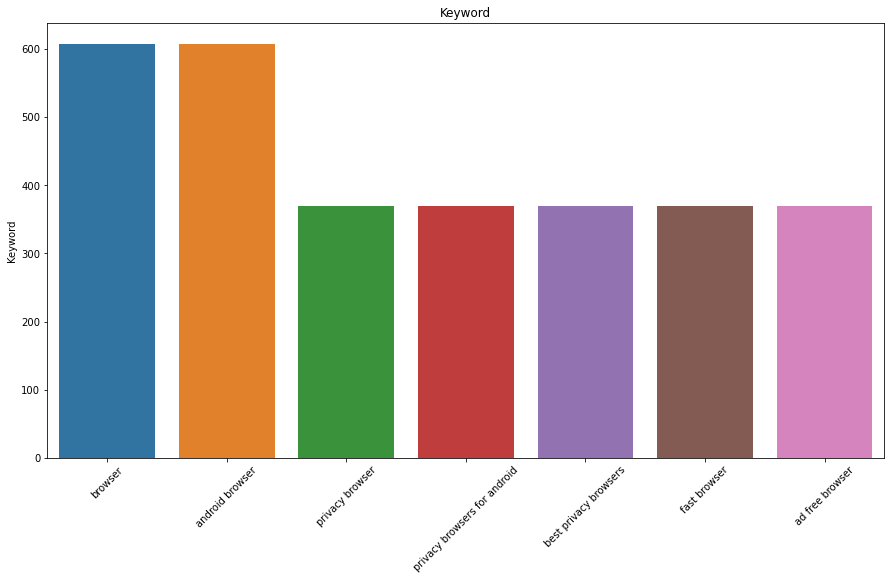

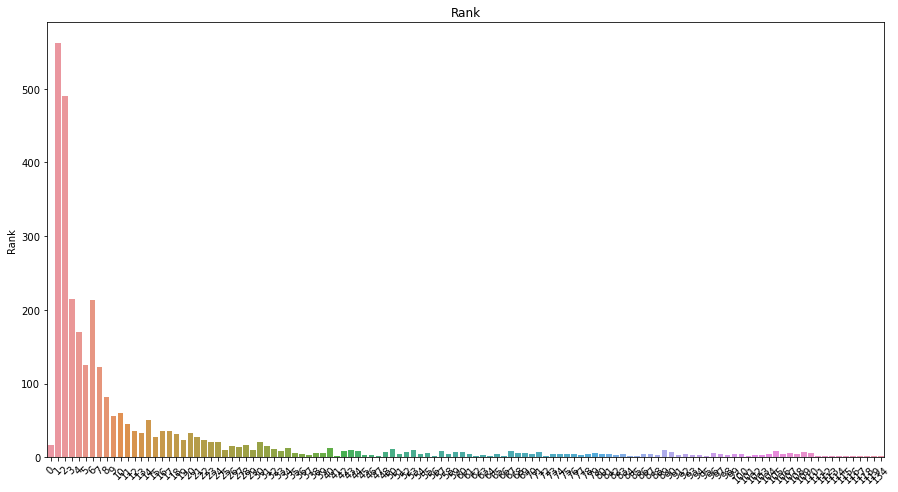

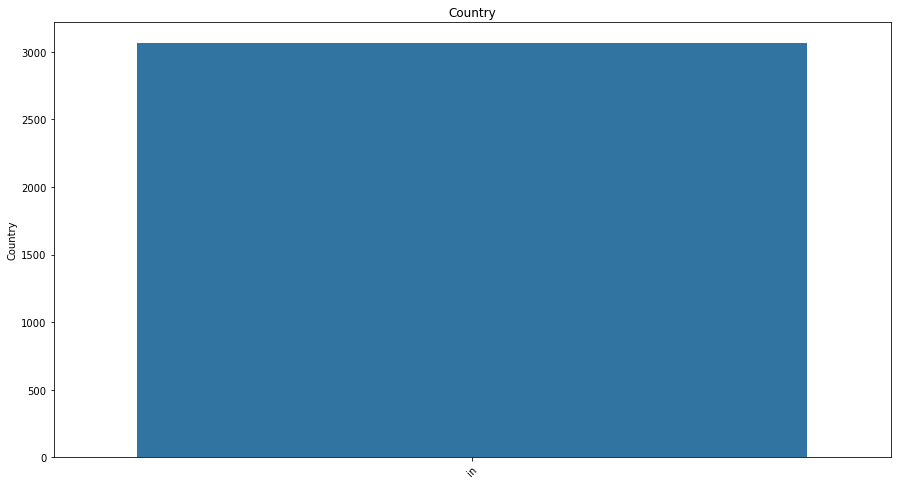

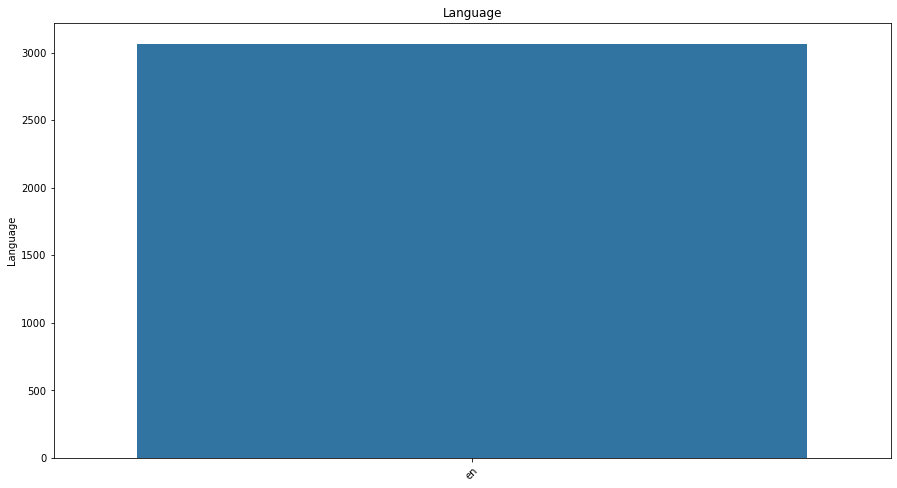

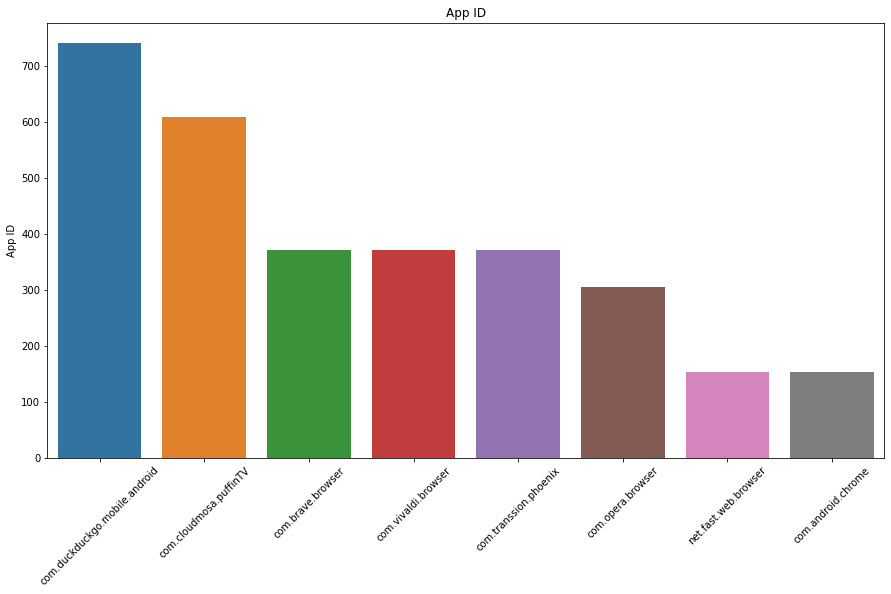

In [88]:
for column in columns:
    plt.figure(figsize = (15,8))
    ax=sns.barplot(data[column].value_counts().index,data[column].value_counts()).set_title(column)
    plt.xticks(rotation=45)

#### Understanding the values held under 'Rank'

In [35]:
data['Rank'].value_counts()

1      562
2      490
3      214
6      213
4      170
      ... 
113      1
85       1
62       1
134      1
64       1
Name: Rank, Length: 120, dtype: Int64

In [40]:
x=list(data['Rank'].unique())

In [43]:
x.sort()

Below is the list of unique 'Rank' values

In [44]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 134]


Below is the histogram plot for Ranking data. Data is not normalised.

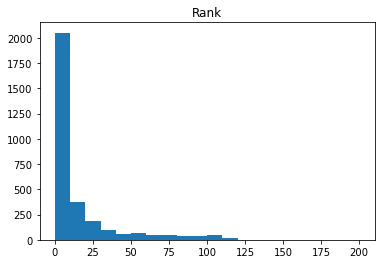

In [18]:
plt.hist(data['Rank'],bins=20,range=(0,200))
plt.title('Rank')
plt.show()

#### Lets apply some stop words removal before we proceed to our text data analysis.

In [22]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [24]:
filtrd_stopwords=[re.sub("[^a-zA-Z0-9]+", '',i).lower() for i in lst_stopwords]

In [25]:
def normalize(text):
    #tokenize text
    lst_text = text.split()
    #remove stop words
    lst_text = [word for word in lst_text if word not in filtrd_stopwords]

    return " ".join(lst_text).strip()

In [27]:
data['Short Description']=data['Short Description'].apply(lambda x: normalize(x))
data['Long Description']=data['Long Description'].apply(lambda x: normalize(x))

In [28]:
data.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2,in,en,2020-12-16,net.fast.web.browser,2020-12-18,small fastest secure web browser best mobile browser fast search google,one smallest fastest secure web browser specifically designed mobile phones tablet brings amazing premium web experience based android webkit engine key features tabbed internet browsing incognito...
1,2,browser,3,in,en,2020-12-16,com.android.chrome,2020-12-18,fast simple secure google chrome browser android phones tablets,google chrome fast easy use secure web browser designed android chrome brings personalized news articles quick links favorite sites downloads google search google translate built download enjoy ch...
2,3,browser,4,in,en,2020-12-16,com.opera.browser,2021-02-27,fast safe web browser free vpn ad blocker qr code reader amp personalized news,fast safe private introducing latest version opera web browser made make life easier online featuring built ad blocker free vpn clean user friendly design letting get done online less time downloa...
3,3,browser,4,in,en,2020-12-16,com.opera.browser,2020-12-18,fast safe web browser free vpn ad blocker qr code reader amp personalized news,opera fast safe web browser android device featuring rebooted news feed built ad blocker free vpn qr barcode scanner top features free unlimited built vpn improve privacy security built free vpn t...
4,4,browser,1,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,puffin tv browser one app watch videos web,puffin tv browser special edition puffin web browser optimized android tv light users absolutely free heavy users requires subscription app purchase pc users watch videos web browser pc need insta...


In [29]:
data[data.Rank>=100]

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
93,244,privacy browser,100,in,en,2020-12-19,com.vivaldi.browser,2020-12-18,fast amp private web browser ad blocker sync dark amp private mode,vivaldi new private web browser integrated ad blocker tracking protection useful built features browse unique desktop style tabs end end encrypted sync dark private mode download free browse fast ...
137,423,privacy browsers for android,134,in,en,2020-12-21,com.vivaldi.browser,2020-12-18,fast amp private web browser ad blocker sync dark amp private mode,vivaldi new private web browser integrated ad blocker tracking protection useful built features browse unique desktop style tabs end end encrypted sync dark private mode download free browse fast ...
335,10022,fast browser,109,in,en,2020-12-26,com.vivaldi.browser,2020-12-18,fast amp private web browser ad blocker sync dark amp private mode,vivaldi new private web browser integrated ad blocker tracking protection useful built features browse unique desktop style tabs end end encrypted sync dark private mode download free browse fast ...
395,11178,fast browser,109,in,en,2020-12-27,com.vivaldi.browser,2020-12-18,fast amp private web browser ad blocker sync dark amp private mode,vivaldi new private web browser integrated ad blocker tracking protection useful built features browse unique desktop style tabs end end encrypted sync dark private mode download free browse fast ...
440,12321,ad free browser,111,in,en,2020-12-28,com.transsion.phoenix,2020-12-18,funny video football amp celebrity news fast amp data saving browser,phoenix browser fast safe web browser android device featuring local news feed free movie resources main features phoenix browser loads webpages 2x faster saves 90 data enables smooth browsing slo...
...,...,...,...,...,...,...,...,...,...,...
2822,119044,privacy browser,116,in,en,2021-03-01,com.vivaldi.browser,2020-12-18,fast amp private web browser ad blocker sync dark amp private mode,vivaldi new private web browser integrated ad blocker tracking protection useful built features browse unique desktop style tabs end end encrypted sync dark private mode download free browse fast ...
2837,119056,fast browser,106,in,en,2021-03-01,com.vivaldi.browser,2020-12-18,fast amp private web browser ad blocker sync dark amp private mode,vivaldi new private web browser integrated ad blocker tracking protection useful built features browse unique desktop style tabs end end encrypted sync dark private mode download free browse fast ...
2865,120973,privacy browser,115,in,en,2021-03-02,com.vivaldi.browser,2020-12-18,fast amp private web browser ad blocker sync dark amp private mode,vivaldi new private web browser integrated ad blocker tracking protection useful built features browse unique desktop style tabs end end encrypted sync dark private mode download free browse fast ...
2880,120985,fast browser,110,in,en,2021-03-02,com.vivaldi.browser,2020-12-18,fast amp private web browser ad blocker sync dark amp private mode,vivaldi new private web browser integrated ad blocker tracking protection useful built features browse unique desktop style tabs end end encrypted sync dark private mode download free browse fast ...


In [37]:
data['Short Description'].value_counts()

browse web privately search anonymously escape ad trackers                        740
puffin tv browser one app watch videos web                                        608
free safe internet browser private browsing search engine amp pop blocker         370
fast amp private web browser ad blocker sync dark amp private mode                370
funny video football amp celebrity news fast amp data saving browser              370
fast safe web browser free vpn ad blocker qr code reader amp personalized news    304
small fastest secure web browser best mobile browser fast search google           152
fast simple secure google chrome browser android phones tablets                   152
Name: Short Description, dtype: int64

In [39]:
data[data['Short Description']=='browse web privately search anonymously escape ad trackers']['Rank'].value_counts()

1     428
6     104
7      24
30     16
5      12
21     12
2      12
24     10
8      10
23      8
32      8
31      8
20      6
33      6
40      6
34      6
28      6
26      6
22      4
35      4
19      4
17      4
18      4
25      4
44      4
27      4
11      2
15      2
13      2
39      2
29      2
42      2
9       2
43      2
37      2
16      2
Name: Rank, dtype: Int64

In [49]:
data[(data['Short Description']=='browse web privately search anonymously escape ad trackers')&(data['Rank']==2)]

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
741,21660,best privacy browsers,2,in,en,2021-01-05,com.duckduckgo.mobile.android,2021-02-13,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...
742,21660,best privacy browsers,2,in,en,2021-01-05,com.duckduckgo.mobile.android,2020-12-18,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...
771,22900,privacy browser,2,in,en,2021-01-06,com.duckduckgo.mobile.android,2021-02-13,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...
772,22900,privacy browser,2,in,en,2021-01-06,com.duckduckgo.mobile.android,2020-12-18,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...
781,22908,best privacy browsers,2,in,en,2021-01-06,com.duckduckgo.mobile.android,2021-02-13,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...
782,22908,best privacy browsers,2,in,en,2021-01-06,com.duckduckgo.mobile.android,2020-12-18,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...
852,25277,privacy browser,2,in,en,2021-01-08,com.duckduckgo.mobile.android,2021-02-13,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...
853,25277,privacy browser,2,in,en,2021-01-08,com.duckduckgo.mobile.android,2020-12-18,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...
2627,107933,best privacy browsers,2,in,en,2021-02-24,com.duckduckgo.mobile.android,2021-02-13,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...
2628,107933,best privacy browsers,2,in,en,2021-02-24,com.duckduckgo.mobile.android,2020-12-18,browse web privately search anonymously escape ad trackers,tired tracked online help duckduckgo believe online privacy simple duckduckgo privacy browser speed need browsing features expect like tabs bookmarks comes packed best class privacy essentials tap...


In [71]:
def keyword_check(key,text,limit):
    key_list=key.split()
    text_list=text.split()
    if limit!=-1:
        result=[text_list[:limit].count(i) for i in key_list]
        return sum(result)
    else:
        result=[text_list.count(i) for i in key_list]
        return sum(result)

In [72]:
data['keyword_in_LD20']=data.apply(lambda x:keyword_check(x['Keyword'],x['Long Description'],20),axis=1)

In [73]:
data['keyword_in_LD15']=data.apply(lambda x:keyword_check(x['Keyword'],x['Long Description'],15),axis=1)

In [74]:
data['keyword_in_LD10']=data.apply(lambda x:keyword_check(x['Keyword'],x['Long Description'],10),axis=1)

In [75]:
data['keyword_in_SD']=data.apply(lambda x:keyword_check(x['Keyword'],x['Short Description'],-1),axis=1)

In [79]:
data['keyword_in_SD_LD10']=data.apply(lambda x: x['keyword_in_SD']+x['keyword_in_LD10'],axis=1)

In [80]:
data['keyword_in_SD_LD15']=data.apply(lambda x: x['keyword_in_SD']+x['keyword_in_LD15'],axis=1)
data['keyword_in_SD_LD20']=data.apply(lambda x: x['keyword_in_SD']+x['keyword_in_LD20'],axis=1)

### Below it is the heatmap which shows the correlation across various fields

#### To bring out a relationship between keyword,short discription,long discription and rank I have introduced some quantitized values. they are :

keyword_in_LD20 --> number of times each keyword was present in the first 20 words on long siscription.<br>
keyword_in_LD15 --> number of times each keyword was present in the first 15 words on long siscription.<br>
keyword_in_LD10 --> number of times each keyword was present in the first 10 words on long siscription.<br>
keyword_in_SD --> number of times each keyword was present in the short siscription.<br>
keyword_in_SD_LD10 --> number of times each keyword was present in the short discription + first 10 words on long siscription.<br>
keyword_in_SD_LD15 --> number of times each keyword was present in the short discription + first 15 words on long siscription.<br>
keyword_in_SD_LD20 --> number of times each keyword was present in the short discription + first 20 words on long siscription.<br>

<AxesSubplot:>

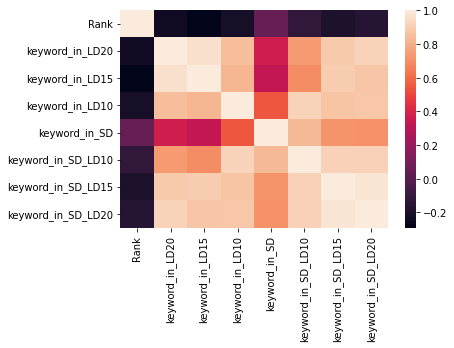

In [81]:
sns.heatmap(data[['Rank','keyword_in_LD20','keyword_in_LD15','keyword_in_LD10','keyword_in_SD','keyword_in_SD_LD10','keyword_in_SD_LD15','keyword_in_SD_LD20']].corr())

In [82]:
data[['Rank','keyword_in_LD20','keyword_in_LD15','keyword_in_LD10','keyword_in_SD','keyword_in_SD_LD10','keyword_in_SD_LD15','keyword_in_SD_LD20']].corr()

,Rank,keyword_in_LD20,keyword_in_LD15,keyword_in_LD10,keyword_in_SD,keyword_in_SD_LD10,keyword_in_SD_LD15,keyword_in_SD_LD20
Rank,1.000000,-0.238115,-0.291190,-0.214737,0.047123,-0.119866,-0.192864,-0.160590
keyword_in_LD20,-0.238115,1.000000,0.961516,0.844228,0.371504,0.733627,0.887027,0.917852
keyword_in_LD15,-0.291190,0.961516,1.000000,0.821452,0.325497,0.696877,0.893635,0.868974
keyword_in_LD10,-0.214737,0.844228,0.821452,1.000000,0.545536,0.918702,0.866103,0.874019
keyword_in_SD,0.047123,0.371504,0.325497,0.545536,1.000000,0.832189,0.715229,0.709500
keyword_in_SD_LD10,-0.119866,0.733627,0.696877,0.918702,0.832189,1.000000,0.910082,0.912619
keyword_in_SD_LD15,-0.192864,0.887027,0.893635,0.866103,0.715229,0.910082,1.000000,0.979052
keyword_in_SD_LD20,-0.160590,0.917852,0.868974,0.874019,0.709500,0.912619,0.979052,1.000000


### Looking at the above correlation matrix and heatmap We can say that

1) keyword_in_LD20,keyword_in_LD15,keyword_in_LD10,keyword_in_SD_LD10,keyword_in_SD_LD15,keyword_in_SD_LD20 are neagtively correlated with the ranking values. Among which keyword_in_LD15 was the least negatively correlated.<br>
2) Which means that more the number of keywords within first 15 words of discription lesser is the quantitative value of rank (which means high rank in reality).<br>
3) keyword_in_SD keyword in short description barely had a relationship with rank alone.

In [54]:
#lst.count(x)

### Now lets check if APP ID and rank has any relationship in terms of keywords

In [83]:
data['App ID'].unique()

array(['net.fast.web.browser', 'com.android.chrome', 'com.opera.browser',
       'com.cloudmosa.puffinTV', 'com.brave.browser',
       'com.vivaldi.browser', 'com.duckduckgo.mobile.android',
       'com.transsion.phoenix'], dtype=object)

In [95]:
def keyword_inAppID(key,text):
    key_list=key.split()
    text_list=text.split(".")
    result=[text_list.count(i) for i in key_list]
    return sum(result)
        

In [96]:
data['keyword_App_ID']=data.apply(lambda x:keyword_inAppID(x['Keyword'],x['App ID']),axis=1)

<AxesSubplot:>

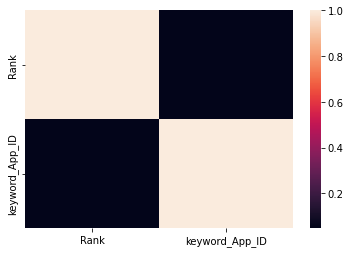

In [97]:
sns.heatmap(data[['Rank','keyword_App_ID']].corr())

In [98]:
data[['Rank','keyword_App_ID']].corr()

,Rank,keyword_App_ID
Rank,1.000000,0.048191
keyword_App_ID,0.048191,1.000000


### Looking at the above correlation matrix and heatmap We can say that

1) There is no relationship between appid , rank and keyword..<br>

In [110]:
rank_mt_50=data[(data['Rank']>=50)]
rank_lt_10=data[(data['Rank']<=10)]
rank_bw_20and50=data[(data['Rank']<=50)&(data['Rank']>=20)]
rank_bw_30and50=data[(data['Rank']<=50)&(data['Rank']>=30)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]),
 [Text(0, 0, 'com.vivaldi.browser'), Text(1, 0, 'com.transsion.phoenix')])

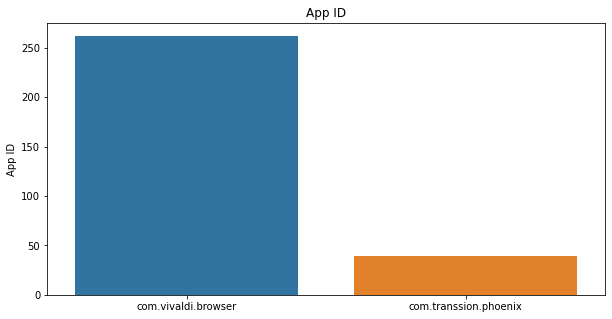

In [104]:
plt.figure(figsize = (10,5))
ax=sns.barplot(rank_mt_50['App ID'].value_counts().index,rank_mt_50['App ID'].value_counts()).set_title('App ID')
plt.xticks(rotation=0)

#### Above is a plot for the App ID more than 50 rank (number value) . We see that com.vivaldi.browser and com.transmission.phoenix are the only ones below 50 ranks. Also they are the App ID with  least records in the dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'com.duckduckgo.mobile.android'),
  Text(1, 0, 'com.cloudmosa.puffinTV'),
  Text(2, 0, 'com.brave.browser'),
  Text(3, 0, 'com.opera.browser'),
  Text(4, 0, 'net.fast.web.browser'),
  Text(5, 0, 'com.android.chrome'),
  Text(6, 0, 'com.transsion.phoenix'),
  Text(7, 0, 'com.vivaldi.browser')])

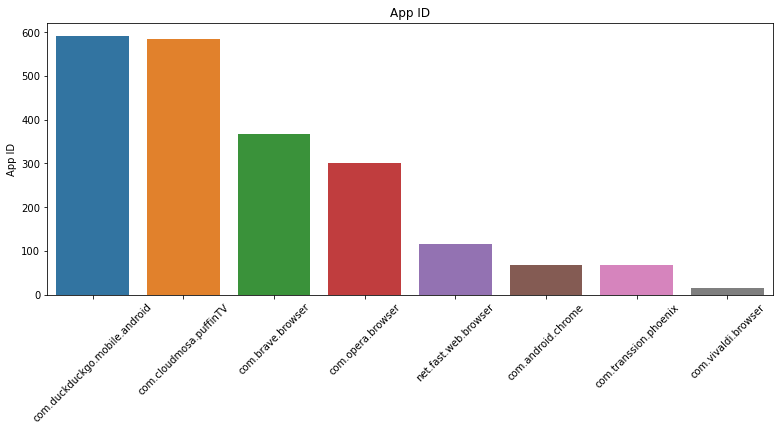

In [106]:
plt.figure(figsize = (13,5))
ax=sns.barplot(rank_lt_10['App ID'].value_counts().index,rank_lt_10['App ID'].value_counts()).set_title('App ID')
plt.xticks(rotation=45)

#### Above is a plot for the App ID less than 10 rank (number value) . We see that all App ID falls under this range atleast once. com.duckduckgo.mobile.android and com.cloudmosa.puffinTV appears to be most popular with higher two records in the dataset and also here we can see that they are the higher falling under the rank less than 10.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'com.duckduckgo.mobile.android'),
  Text(1, 0, 'com.transsion.phoenix'),
  Text(2, 0, 'com.vivaldi.browser'),
  Text(3, 0, 'com.android.chrome'),
  Text(4, 0, 'net.fast.web.browser')])

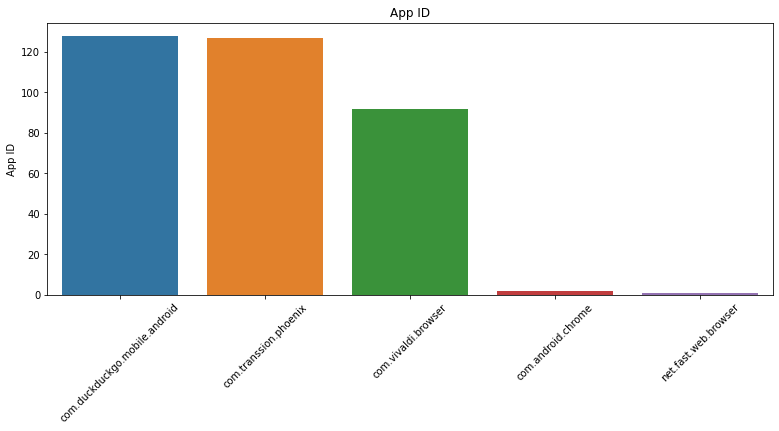

In [109]:
plt.figure(figsize = (13,5))
ax=sns.barplot(rank_bw_20and50['App ID'].value_counts().index,rank_bw_20and50['App ID'].value_counts()).set_title('App ID')
plt.xticks(rotation=45)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'com.duckduckgo.mobile.android'),
  Text(1, 0, 'com.vivaldi.browser'),
  Text(2, 0, 'com.transsion.phoenix')])

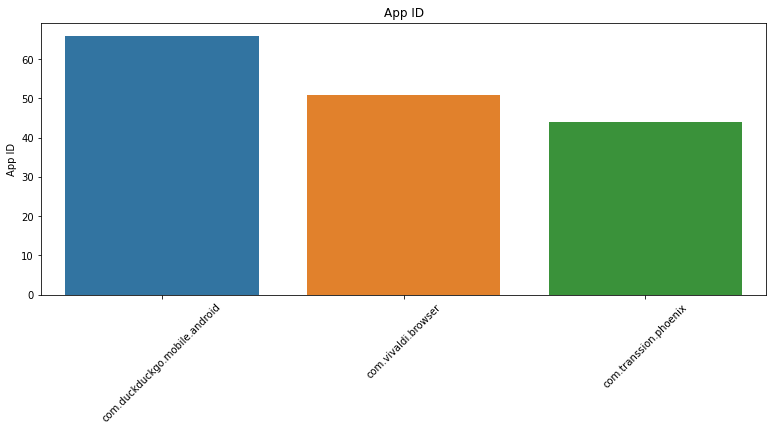

In [111]:
plt.figure(figsize = (13,5))
ax=sns.barplot(rank_bw_30and50['App ID'].value_counts().index,rank_bw_30and50['App ID'].value_counts()).set_title('App ID')
plt.xticks(rotation=45)

In [107]:
data['App ID'].value_counts()

com.duckduckgo.mobile.android    740
com.cloudmosa.puffinTV           608
com.brave.browser                370
com.vivaldi.browser              370
com.transsion.phoenix            370
com.opera.browser                304
net.fast.web.browser             152
com.android.chrome               152
Name: App ID, dtype: int64

In [112]:
now = pd.Timestamp('now')
data['last_update_age'] = (now - data['Date of Last Description Change']).astype('timedelta64[D]')

<AxesSubplot:xlabel='Rank'>

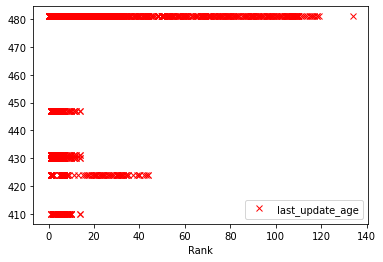

In [114]:
data.plot(x='Rank', y='last_update_age',style='rx')